# Aula 3: Visualização e Simulação

Nesta aula vamos ver: 

- Como utilizar mapas de cores para visualizar dados

- Gerar dados através de simulações

- Visualização em tempo real da simulação 

## `Matplotlib`

> Como sempre, aqui está o link da documentação oficial do `Matplotlib`: https://matplotlib.org/stable/users/index

Em aula anteriores, já utilizamos o `Matplotlib`, agora vamos ver como podemos utilizar mapas de cores de forma eficiente e flexível.

Suponha que desejamos fazer o gráfico da família de funções $f(x) = \frac{sin(a x)}{x},~ a \in \mathbb{R}$

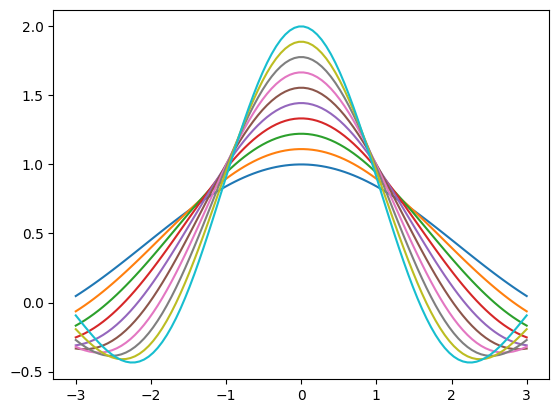

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def func(x, a):
    return np.sin(a * x)/x

n = 100
x = np.linspace(-3, 3, 100)

a_range = np.linspace(1, 2, 10)

ys = [func(x, a) for a in a_range]

for y in ys:
    plt.plot(x, y)

Ok, o gráfico está legal, mas seria interessante utilizar uma mapa de cores para indicar o valor de $a$ para cada curva, então vamos aprender sobre <span style="background: linear-gradient(90deg, #1e90ff, #32cd32, #ff8c00, #ff1493); -webkit-background-clip: text; color: transparent; font-weight: bold;">cores!</span>

## Mapas de Cores

Um mapa de cor é uma função que media um número no intervalo $[0, 1]$ para alguma cor. O `Matplotlib` tem vários mapas de cores prontos para serem utilizados acessíveis via `matplotlib.colormaps`

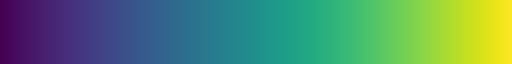

In [3]:
from matplotlib import colormaps as cmaps

cmaps["viridis"]

In [4]:
list(cmaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

Obtendo cores utilizando o mapa de cores

In [5]:
cmap = cmaps["viridis"]

cmap(0.5)

(np.float64(0.127568),
 np.float64(0.566949),
 np.float64(0.550556),
 np.float64(1.0))

Então, no momento de fazer os gráficos, podemos obter uma cor, através de um mapa, utilizando o valor de $a$, apenas precisamos transformar o intervalo de valores de $a$ para o intervalo $[0, 1]$ 

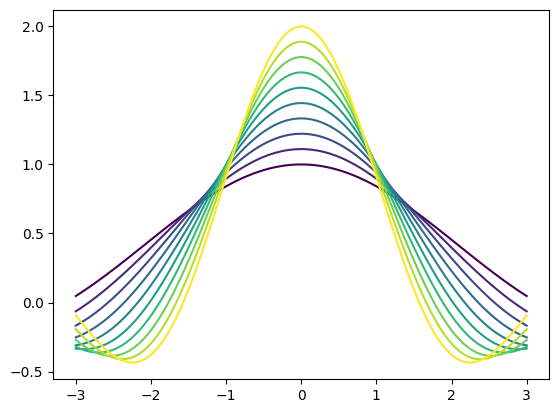

In [6]:
def normalize(a: np.ndarray):
    a_min, a_max = a.min(), a.max()
    return (a - a_min) / (a_max - a_min)

a_norm = normalize(a_range)

for a, y in zip(a_norm, ys):
    plt.plot(x, y, c=cmap(a))

o `Matplotlib` possui um objetos responsáveis por realizar a normalização, os normalizadores, que são classes definidas dentro do módulo `matplotlib.colors`.

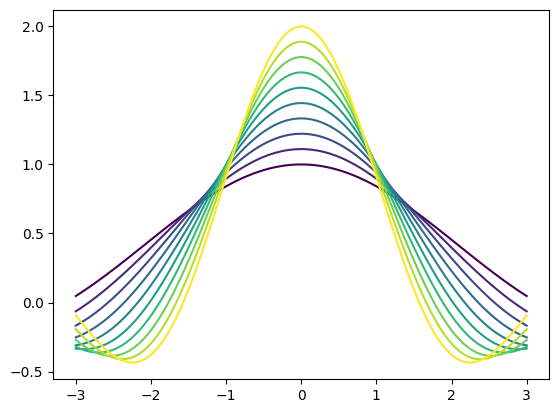

In [7]:
from matplotlib.colors import Normalize # Normalizador linear

norm = Normalize(vmin=a_range.min(), vmax=a_range.max())

for a, y in zip(a_range, ys):
    plt.plot(x, y, c=cmap(norm(a)))

Também é útil mostrar o mapa de cores utilizado na figura. Para isso, precisamos combinar o normalizador e o mapa de cores em um único objeto, então utilizá-lo na função `plt.colorbar`

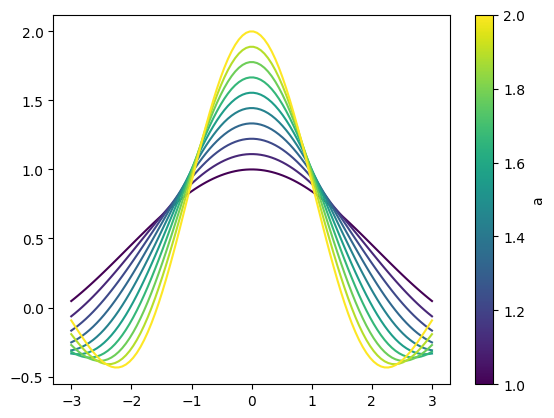

In [8]:
cmap = cmaps["viridis"]

for a, y in zip(a_range, ys):
    plt.plot(x, y, c=cmap(norm(a)))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=plt.gca(), label="a")

## Usando cor para visualizar flutuações

É muito comum termos um conjunto de dados que possui uma média e flutuações em torno dela, mapas de cores são ferramentas muito úteis para visualizar as flutuações.

Vamos proceduralmente gerar um terreno 2-D, então visualizar ele através de um mapa de cores indicando a altura em cada ponto. Podemos interpretar a superfícies de um terreno qualquer ($z(\vec r)$) como uma série de funções senoidais

$$
z(\vec r) = \sum_{i=1}^{N} A_i \sin(\vec{k}_i \cdot \vec{r} + \phi_i)
$$

onde $\vec{r} = (x, y)$, $A_i$ é a amplitude, $\vec{k}_i$ é o vetor de onda, e $\phi_i$ é a fase de cada componente senoidal.

Vamos gerar o terreno através de camadas de detalhes. Cada camada possui todos os vetores de onda com a mesma amplitude, a amplitude ($A$) diminui com a camada e a fase ($\phi$) e direção dos $\vec k$ são aleatórias. Seja $\vec k_{i, l}$ o $i$-ésimo vetor de onda da camada $l$, $A_l$ a amplitude da camada $l$ e $\phi_{i, l}$ a $i$-ésima fase da camada $l$, então

$$
z(\vec r) = \sum_{l=1}^{N_l} \sum_{i=1}^{N} A_{l} \sin(\vec r \cdot k_{i, l} + \phi_{i, l}), ~ |\vec k_{i, l}| = k_l
$$

vamos implementar essa soma com uma relação de recorrência para $A_l$ e $k_l$

$$
A_{l+1} = A_l \cdot (1 - c_A) \\
k_{l+1} = k_l \cdot (1 + c_k)

$$

<Figure size 640x480 with 0 Axes>

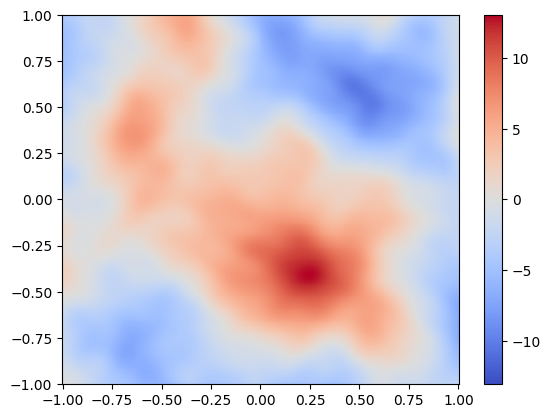

<Figure size 640x480 with 0 Axes>

In [9]:
def sine_wave(r, k, amp, phase):
    return amp * np.sin((r*k).sum(axis=-1) + phase)

def generate_terrain(xlims, ylims, num_layers=6, layer_detail=15, amp_mult=0.8, k_mult=1.2, space_resolution=100):
    num_x = round((xlims[1] - xlims[0]) * space_resolution)
    num_y = round((ylims[1] - ylims[0]) * space_resolution)

    xy = np.meshgrid(
        np.linspace(*xlims, num_x),
        np.linspace(*ylims, num_y),
    )
    xy = np.stack(xy, axis=-1)
    
    z = np.zeros_like(xy[..., 0])

    k_norm = 2 * np.pi / max(xlims[1] - xlims[0], ylims[1] - ylims[0])
    amp = 1
    for i in range(num_layers):
        angles = np.random.random(layer_detail) * 2 * np.pi
        phases = np.random.random(layer_detail) * 2 * np.pi
        k_hat = np.stack((np.cos(angles), np.sin(angles)), axis=-1)
        for j in range(layer_detail):
            z += sine_wave(xy, k_hat[j]*k_norm, amp, phases[j])
        
        amp *= amp_mult
        k_norm *= k_mult

    return z, xy


terrain, xy = generate_terrain(
    xlims=(-1, 1), 
    ylims=(-1, 1), 
    num_layers=15, 
    layer_detail=10, 
    space_resolution=200,
)

from matplotlib.colors import CenteredNorm

plt.pcolormesh(xy[..., 0], xy[..., 1], terrain, cmap="coolwarm", norm=CenteredNorm())
plt.colorbar()
plt.figure()

## Usando cor para visualizar propriedades de pontos

Vamos criar uma nuvem de pontos, colorir cada ponto através de um mapa de cores de forma aleatória, e colorir de verde os pontos cuja distância à origem é menor do que 1

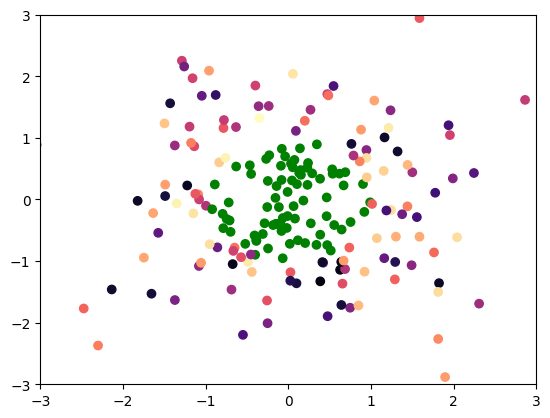

In [10]:
n = 200

pos = np.random.randn(2, n) 

cmap = cmaps["magma"].with_extremes(under="green")

mask = (pos**2).sum(axis=0) < 1

colors = np.random.rand(n)
colors[mask] = -1

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.scatter(*pos, c=cmap(colors))

## Exercício 1

Considere o seguinte campo de velocidades

$$
\vec v(x, y) = (sin(x), cos(y))
$$

gere pontos aleatórios em $[-2, 2] \times [-3, 3]$ e faça o gráfico deles, colorindo os pontos de acordo com o módulo de sua velocidade. 

In [ ]:
# Se divirta :)

<details>
<summary>Solução: Clique para expandir</summary>

```python
def velocity(x):
    vel = np.empty_like(x)
    vel[0, :] = np.sin(x[0, :])
    vel[1, :] = np.cos(x[1, :])
    return vel

n = 1000

x = np.random.rand(2, n)
x[0, :] = x[0, :] * 4 - 2 
x[1, :] = x[1, :] * 6 - 3

vel = velocity(x)

speed = (vel**2).sum(axis=0)

plt.scatter(*x, c=speed)
```
</details>

## Simulações!

Agora vamos falar um pouco sobre simulações numéricas. Vamos implementar uma gás de partículas ideais com visualização em tempo real. Visualização em tempo real não funciona muito bem em notebook, então vamos para os scripts